In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbs
from scipy.constants import pi
os.sys.path.append('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/')
sbs.set(rc={'figure.figsize': (2*8.3, 2*5.2),
            'text.usetex': True,
            'font.family': 'serif',
            'font.size': 20,
            'axes.linewidth': 2,
            'lines.linewidth': 3,
            'legend.fontsize': 16,
            'legend.numpoints': 1, },
        style='ticks',
        palette='colorblind',
        context='talk')
from Schenk import *

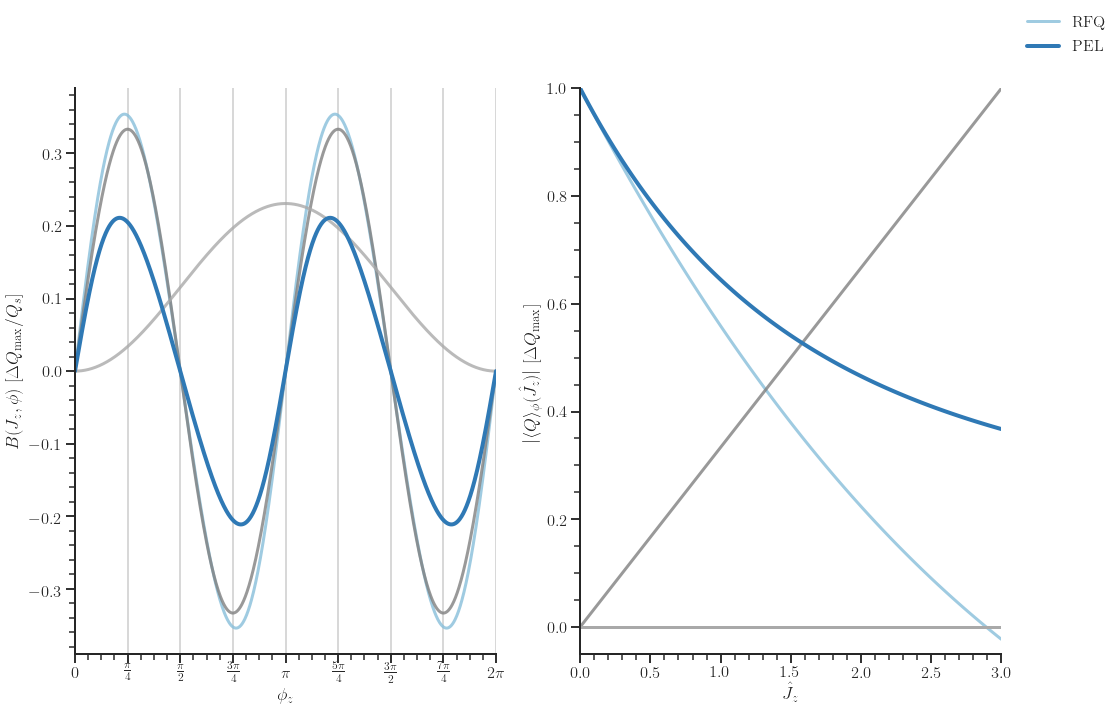

In [12]:
palette = sbs.color_palette('RdBu')
phi = np.linspace(0, 2*pi, 1000)
Jz = np.linspace(0, 3, 100)

fig, (ax, ax2) = plt.subplots(1, 2)
dQmax=1e-3
ax.plot(phi, B(B_integrand_RFQ, Jz=2, phi=phi) /
        dQmax,  label='RFQ', color=palette[-2], alpha=0.8)
ax2.plot(Jz, Q_average_detuning_RFQ(Jz) /
        dQmax, color=palette[-2], alpha=0.8)

ax.plot(phi, -B(B_integrand_Qpp, Jz=2, phi=phi) /
        dQmax,  label='', color='grey', alpha=0.8)
ax2.plot(Jz, np.abs(Q_average_detuning_Qpp(Jz)) /
        dQmax, color='grey', alpha=0.8)

ax.plot(phi, .1*B(B_integrand_Qp, Jz=2., phi=phi) /
        dQmax,  label='', color='darkgrey', alpha=0.8)
ax2.axhline(0, color='darkgrey')

ax.plot(phi, B(B_integrand, Jz=2, phi=phi) /
        dQmax,  label='PEL', color=palette[-1], linewidth=4)
ax2.plot(Jz, Q_average_detuning(Jz) /
        dQmax, color=palette[-1], linewidth=4)

ax.set_xlabel('$\phi_z$')
ax.set_ylabel(
    '$B(J_z, \phi)$ [$\Delta Q_\mathrm{max}/Q_s$]')
ax2.set_xlabel('$\hat{J_z}$')
ax2.set_ylabel(
    '$| \langle Q \\rangle_\phi (\hat{J_z})|$ [$\Delta Q_\mathrm{max}$]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.set_xlim(0, 2*pi)
ax2.set_xlim(0, 3)
ax2.set_ylim(-0.05, 1)
ticks = np.linspace(0, 2*pi, 9)
ax.set_xticks(ticks)
ax.minorticks_on()
ax2.minorticks_on()

ax.set_xticklabels(
    ['$0$',
     '$\\frac{\pi}{4}$',
     '$\\frac{\pi}{2}$',
     '$\\frac{3\pi}{4}$',
     '$\pi$',
     '$\\frac{5\pi}{4}$',
     '$\\frac{3\pi}{2}$',
     '$\\frac{7\pi}{4}$',
     '$2\pi$'],)
ax.xaxis.grid()
plt.figlegend(frameon=False)
plt.savefig('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/Results/'+'B.pdf', bbox_inches='tight')
plt.show()